#**Challenge Correlação e Regressão.**

##***Desafio Análise de Correlação:***

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é
muito importante precificar corretamente o imóvel, caso contrário, os corretores
podem perder a venda. Como parte do time de dados, você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

Para responder esse desafio: A base de dados: desafio_01_preco_imoveis.csv contém as seguintes informações:

● id : código identificador do imóvel;

● date: data em que o imóvel foi cadastrado;

● price: preço do imóvel;

● bedrooms: número de quartos;

● bathrooms: número de banheiros;

● sqft_living: tamanho do imóvel (dentro da casa);

● sqft_lot: tamanho do lote / terreno;

● floors: andares;

● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.

● view: indica o número de quartos com vista.

● condition: condição do imóvel, escala de 1 a 5

● grade: nota do imóvel.

● sqft_above: tamanho da casa acima do solo (excluindo porão).

● sqft_basement: tamanho do porão.

● yr_built: ano em que a casa foi construída.

● yr_renovated: ano em que a casa foi renovada.

● zipcode: "CEP" do imóvel.

● lat: latitude do imóvel.

● long: longitude do imóvel.

1 - Analise a correlação de todas as variáveis com o preço do imóvel. 
Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

2 - Para as top 5 variáveis mais correlacionadas com o preço:

1. plote as suas distribuições (histograma e boxplot)
2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.
3. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados.

**Importando Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px;

**Leitura dos dados**

In [ ]:
df = pd.read_csv('desafio_01_preco_imoveis-230209-165044.csv', sep=',')

**Visualizando os Dados**

In [ ]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


**Verificando o tamanho do Dataset**

In [ ]:
df.shape

(21613, 19)

**Verificando as informações dos tipos de Dados**

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Estatisticas Descritivas**

In [ ]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32


**1 - Analise a correlação de todas as variáveis com o preço do imóvel. 
Quais variáveis são mais correlacionadas? 
Quais são menos correlacionadas?**

In [ ]:
#matriz de correlaçao
matriz_correlacao = df.corr().round(4)
matriz_correlacao

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.0000,-0.0168,0.0013,0.0052,-0.0123,-0.1321,0.0185,-0.0027,0.0116,-0.0238,0.0081,-0.0108,-0.0052,0.0214,-0.0169,-0.0082,-0.0019,0.0208
price,-0.0168,1.0000,0.3083,0.5251,0.7020,0.0897,0.2568,0.2664,0.3973,0.0364,0.6674,0.6056,0.3238,0.0540,0.1264,-0.0532,0.3070,0.0216
bedrooms,0.0013,0.3083,1.0000,0.5159,0.5767,0.0317,0.1754,-0.0066,0.0795,0.0285,0.3570,0.4776,0.3031,0.1542,0.0188,-0.1527,-0.0089,0.1295
bathrooms,0.0052,0.5251,0.5159,1.0000,0.7547,0.0877,0.5007,0.0637,0.1877,-0.1250,0.6650,0.6853,0.2838,0.5060,0.0507,-0.2039,0.0246,0.2230
sqft_living,-0.0123,0.7020,0.5767,0.7547,1.0000,0.1728,0.3539,0.1038,0.2846,-0.0588,0.7627,0.8766,0.4350,0.3180,0.0554,-0.1994,0.0525,0.2402
sqft_lot,-0.1321,0.0897,0.0317,0.0877,0.1728,1.0000,-0.0052,0.0216,0.0747,-0.0090,0.1136,0.1835,0.0153,0.0531,0.0076,-0.1296,-0.0857,0.2295
floors,0.0185,0.2568,0.1754,0.5007,0.3539,-0.0052,1.0000,0.0237,0.0294,-0.2638,0.4582,0.5239,-0.2457,0.4893,0.0063,-0.0591,0.0496,0.1254
waterfront,-0.0027,0.2664,-0.0066,0.0637,0.1038,0.0216,0.0237,1.0000,0.4019,0.0167,0.0828,0.0721,0.0806,-0.0262,0.0929,0.0303,-0.0143,-0.0419
view,0.0116,0.3973,0.0795,0.1877,0.2846,0.0747,0.0294,0.4019,1.0000,0.0460,0.2513,0.1676,0.2769,-0.0534,0.1039,0.0848,0.0062,-0.0784
condition,-0.0238,0.0364,0.0285,-0.1250,-0.0588,-0.0090,-0.2638,0.0167,0.0460,1.0000,-0.1447,-0.1582,0.1741,-0.3614,-0.0606,0.0030,-0.0149,-0.1065


In [ ]:
# Seleciona a coluna correspondente à variável "preço" e ordena as correlações em ordem decrescente(mais correlacionadas)
corr_with_price = matriz_correlacao['price'].sort_values(ascending=False).round(4)
corr_with_price

price            1.0000
sqft_living      0.7020
grade            0.6674
sqft_above       0.6056
bathrooms        0.5251
view             0.3973
sqft_basement    0.3238
bedrooms         0.3083
lat              0.3070
waterfront       0.2664
floors           0.2568
yr_renovated     0.1264
sqft_lot         0.0897
yr_built         0.0540
condition        0.0364
long             0.0216
id              -0.0168
zipcode         -0.0532
Name: price, dtype: float64

In [ ]:
# Seleciona a coluna correspondente à variável "preço" e ordena as correlações em ordem crescente(menos correlacionadas)
corr_with_price = matriz_correlacao['price'].sort_values(ascending=True).round(4)
corr_with_price

zipcode         -0.0532
id              -0.0168
long             0.0216
condition        0.0364
yr_built         0.0540
sqft_lot         0.0897
yr_renovated     0.1264
floors           0.2568
waterfront       0.2664
lat              0.3070
bedrooms         0.3083
sqft_basement    0.3238
view             0.3973
bathrooms        0.5251
sqft_above       0.6056
grade            0.6674
sqft_living      0.7020
price            1.0000
Name: price, dtype: float64

2. Para as top 5 variáveis mais correlacionadas com o preço:

* plote as suas distribuições (histograma e boxplot)

* plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.

* para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.*

In [ ]:
# Realiza matriz de correlação
matriz_correlacao = df.corr()

In [ ]:
# Seleciona a coluna correspondente à variável "preço" e ordena as correlações em ordem decrescente
corr_with_price = matriz_correlacao['price'].sort_values(ascending=False)

In [ ]:
# Imprime as variáveis mais correlacionadas com "preço"
print(corr_with_price)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


<AxesSubplot:>

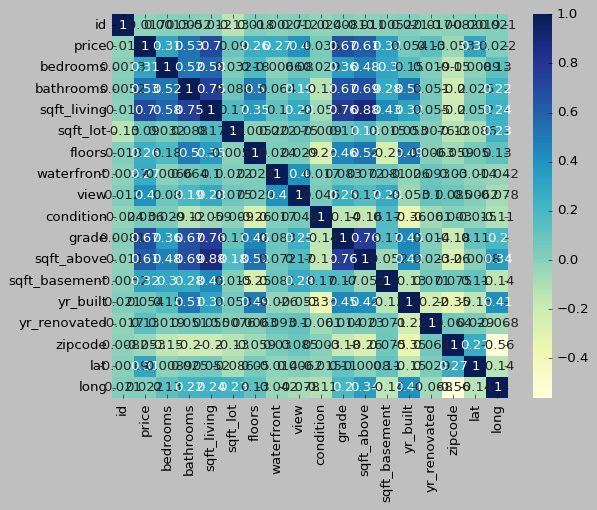

In [ ]:
# Cria mapa de calor com correlação entre variáveis onde cada célula é colorida de acordo com o seu valor de correlação
sns.heatmap(matriz_correlacao, annot=True, cmap="YlGnBu") 

**Plote as suas distribuições (histograma e boxplot)**

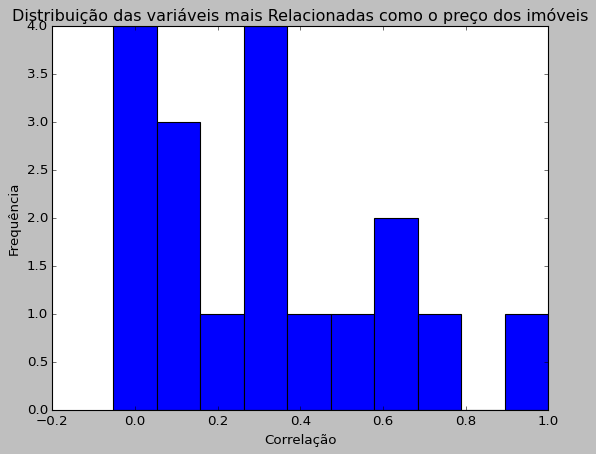

In [ ]:
plt.style.use('classic')
corr_with_price.plot.hist()
plt.title('Distribuição das variáveis correlacionadas como o preço dos imóveis')
plt.xlabel('Correlação')
plt.ylabel('Frequência')
plt.show()

<AxesSubplot:title={'center':'Distribuição das variáveis mais Relacionadas como o preço dos imóveis'}, xlabel='Correlação', ylabel='Frequência'>

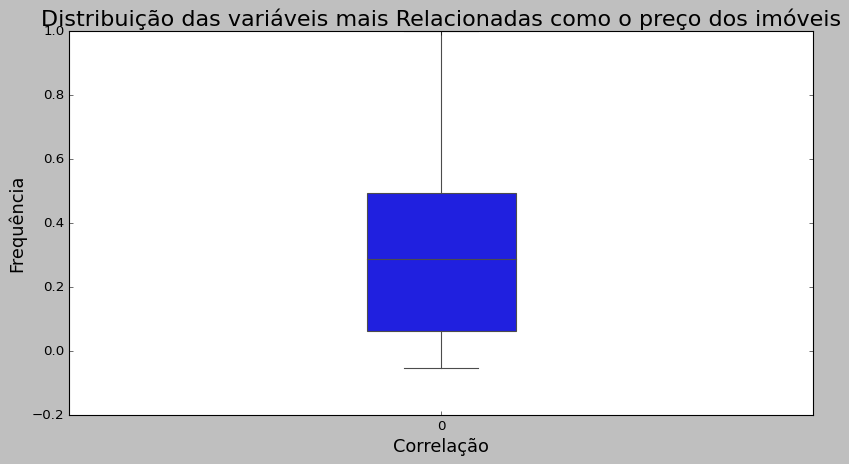

In [ ]:
ax = sns.boxplot(data=corr_with_price, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das variáveis correlacionadas como o preço dos imóveis', fontsize=20)
ax.set_xlabel('Correlação', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)
ax

**plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.**

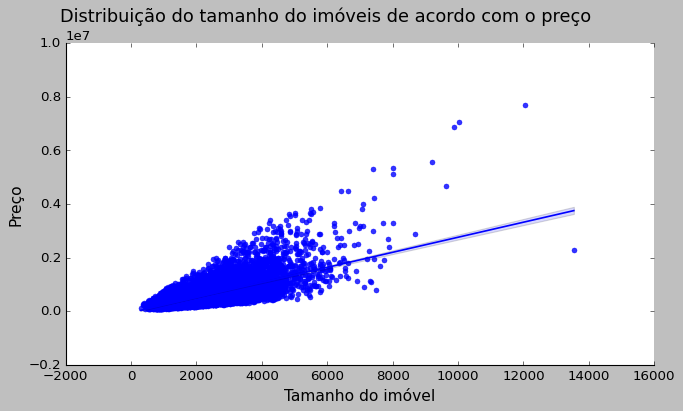

In [ ]:
ax = sns.lmplot(x='sqft_living', y='price', data=df)
ax.fig.set_size_inches(10, 5)
ax.fig.suptitle('Distribuição do tamanho do imóveis de acordo com o preço', fontsize=16, y=1.02)
ax.set_xlabels('Tamanho do imóvel', fontsize=14)
ax.set_ylabels('Preço', fontsize=14)
ax

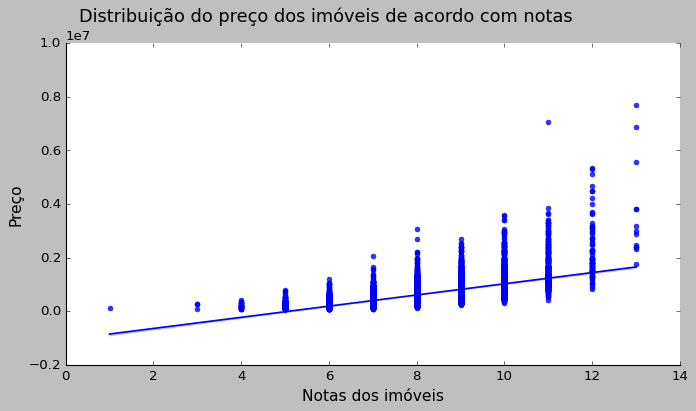

In [ ]:
ax = sns.lmplot(x='grade', y='price', data=df)
ax.fig.set_size_inches(10, 5)
ax.fig.suptitle('Distribuição do preço dos imóveis de acordo com notas', fontsize=16, y=1.02)
ax.set_xlabels('Notas dos imóveis', fontsize=14)
ax.set_ylabels('Preço', fontsize=14)
ax

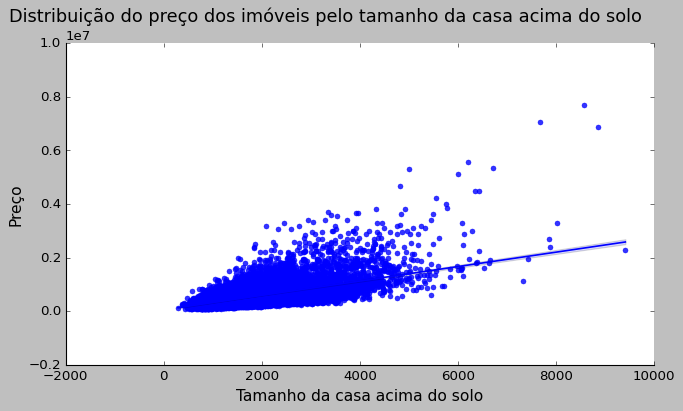

In [ ]:
ax = sns.lmplot(x='sqft_above', y='price', data=df)
ax.fig.set_size_inches(10, 5)
ax.fig.suptitle('Distribuição do preço dos imóveis pelo tamanho da casa acima do solo', fontsize=16, y=1.02)
ax.set_xlabels('Tamanho da casa acima do solo', fontsize=14)
ax.set_ylabels('Preço', fontsize=14)
ax

**Para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados**

In [ ]:
#Importando o train_test_split da biblioteca scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
#Criando uma Series (pandas) para armazenar o o preço dos imóveis (y)
y = df['price']

In [ ]:
#Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)
X = df[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view']]

In [ ]:
#Criando os datasets de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [ ]:
#Verificando os tamanhos dos arquivos gerados pela função train_test_split
X_train.shape

(15129, 5)

In [ ]:
X_test.shape

(6484, 5)

In [ ]:
X.shape[0] * 0.3

6483.9

In [ ]:
X.shape[0] * 0.7

15129.099999999999

In [ ]:
#Importando LinearRegression e metrics da biblioteca scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Instanciando a classe LinearRegression()
modelo = LinearRegression()

In [ ]:
#Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.58


In [ ]:
#Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"
y_previsto = modelo.predict(X_test)

In [ ]:
#Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.58


In [ ]:
#Dados de entrada
entrada = X_test[0:1]
entrada

,sqft_living,grade,sqft_above,bathrooms,view
3490,3160,9,3160,2.75,0


In [ ]:
#Gerando previsão pontual
modelo.predict(entrada)[0]

807467.6011006448

In [ ]:
#Obtendo o intercepto do modelo
modelo.intercept_

-577336.9023379781

In [ ]:
type(modelo.intercept_)

numpy.float64

In [ ]:
#Obtendo os coeficientes de regressão
modelo.coef_

array([ 2.02119447e+02,  1.04319961e+05, -3.83428293e+01, -2.60397301e+04,
        9.38126637e+04])

In [ ]:
type(modelo.coef_)

numpy.ndarray

In [ ]:
#Criando uma lista com os nomes das variáveis do modelo
index = ['intercepto','sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view']


In [ ]:
#Criando um DataFrame para armazenar os coeficientes do modelo
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
intercepto,-577336.902338
sqft_living,202.119447
grade,104319.960989
sqft_above,-38.342829
bathrooms,-26039.730111
view,93812.663698


In [ ]:
#Gerando as previsões do modelo para os dados de TREINO
y_previsto_train = modelo.predict(X_train)

Gráfico de dispersão entre valor estimado e valor real

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Distribuiçao dos preços dos imóveis', ylabel='Preço'>

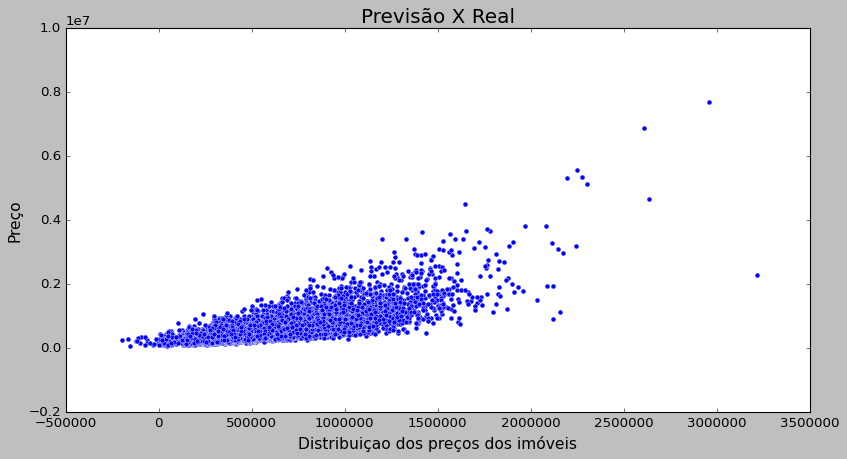

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Distribuiçao dos preços dos imóveis', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
ax

In [ ]:
#Obtendo os resíduos
residuo = y_train - y_previsto_train

Gráfico de dispersão entre valor estimado e resíduos

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Distribuiçao dos preços dos imóveis - Previsão', ylabel='Resíduos'>

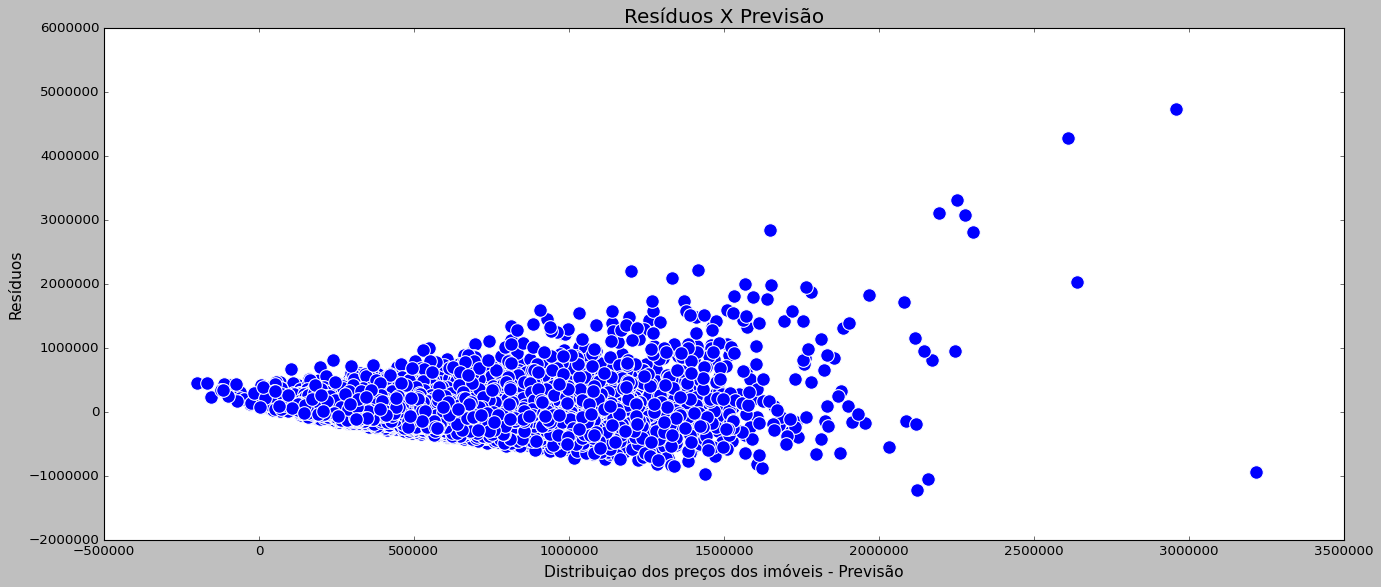

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Distribuiçao dos preços dos imóveis - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

In [ ]:
#Criando um simulador simples
entrada = X_test[0:1]
entrada

,sqft_living,grade,sqft_above,bathrooms,view
3490,3160,9,3160,2.75,0


In [ ]:
#Gerando previsão pontual
modelo.predict(entrada)[0]

807467.6011006448

In [ ]:
sqft_living=3160
grade=9
sqft_above=3160
bathrooms=2.75
view=0
entrada=[[sqft_living, grade, sqft_above, bathrooms, view]]

print('{0:.2f} preço dos imóveis'.format(modelo.predict(entrada)[0]))

807467.60 preço dos imóveis


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
